# Librairies

In [ ]:
import tensorflow_hub as hub
from os import listdir
from os.path import isfile, join
import tarfile
import os
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Loading data

Images are on a tar file. We need to extract them first.

In [ ]:
files = tarfile.open("/content/drive/MyDrive/DATASETS/ML/P6/images.tar")
files.extractall()

# Exploration

In [ ]:
#Setting images directory
dir = "/content/Images"

# Setting image and batch size
IMAGE_RES = 224
BATCH_SIZE = 32

# Loading images from directory
data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_RES ,IMAGE_RES),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 20580 files belonging to 120 classes.


In [ ]:
# Looking at class names
class_names = np.array(data.class_names)

print(class_names)

['n02085620-Chihuahua' 'n02085782-Japanese_spaniel'
 'n02085936-Maltese_dog' 'n02086079-Pekinese' 'n02086240-Shih-Tzu'
 'n02086646-Blenheim_spaniel' 'n02086910-papillon' 'n02087046-toy_terrier'
 'n02087394-Rhodesian_ridgeback' 'n02088094-Afghan_hound'
 'n02088238-basset' 'n02088364-beagle' 'n02088466-bloodhound'
 'n02088632-bluetick' 'n02089078-black-and-tan_coonhound'
 'n02089867-Walker_hound' 'n02089973-English_foxhound' 'n02090379-redbone'
 'n02090622-borzoi' 'n02090721-Irish_wolfhound'
 'n02091032-Italian_greyhound' 'n02091134-whippet'
 'n02091244-Ibizan_hound' 'n02091467-Norwegian_elkhound'
 'n02091635-otterhound' 'n02091831-Saluki' 'n02092002-Scottish_deerhound'
 'n02092339-Weimaraner' 'n02093256-Staffordshire_bullterrier'
 'n02093428-American_Staffordshire_terrier' 'n02093647-Bedlington_terrier'
 'n02093754-Border_terrier' 'n02093859-Kerry_blue_terrier'
 'n02093991-Irish_terrier' 'n02094114-Norfolk_terrier'
 'n02094258-Norwich_terrier' 'n02094433-Yorkshire_terrier'
 'n02095314-w

* classes names are not pretty. Need some cleaning.


In [ ]:
# Cleaning class name by keeping only text (second part)
class_names_clean = []
for c in class_names:  
  first, second = c.split("-", maxsplit =1)
  class_names_clean.append(second)

type(class_names_clean)
type(np.asarray(class_names_clean))

class_names_clean = np.asarray(class_names_clean)
print(class_names_clean)

['Chihuahua' 'Japanese_spaniel' 'Maltese_dog' 'Pekinese' 'Shih-Tzu'
 'Blenheim_spaniel' 'papillon' 'toy_terrier' 'Rhodesian_ridgeback'
 'Afghan_hound' 'basset' 'beagle' 'bloodhound' 'bluetick'
 'black-and-tan_coonhound' 'Walker_hound' 'English_foxhound' 'redbone'
 'borzoi' 'Irish_wolfhound' 'Italian_greyhound' 'whippet' 'Ibizan_hound'
 'Norwegian_elkhound' 'otterhound' 'Saluki' 'Scottish_deerhound'
 'Weimaraner' 'Staffordshire_bullterrier' 'American_Staffordshire_terrier'
 'Bedlington_terrier' 'Border_terrier' 'Kerry_blue_terrier'
 'Irish_terrier' 'Norfolk_terrier' 'Norwich_terrier' 'Yorkshire_terrier'
 'wire-haired_fox_terrier' 'Lakeland_terrier' 'Sealyham_terrier'
 'Airedale' 'cairn' 'Australian_terrier' 'Dandie_Dinmont' 'Boston_bull'
 'miniature_schnauzer' 'giant_schnauzer' 'standard_schnauzer'
 'Scotch_terrier' 'Tibetan_terrier' 'silky_terrier'
 'soft-coated_wheaten_terrier' 'West_Highland_white_terrier' 'Lhasa'
 'flat-coated_retriever' 'curly-coated_retriever' 'golden_retriever'
 

In [ ]:
print(len(class_names_clean))

120


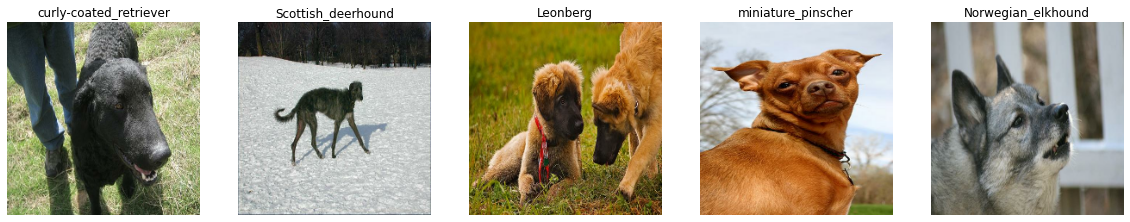

In [ ]:
# Getting some examples
plt.figure( figsize=(20,20))
for images, labels in data.take(1):
  for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_clean[labels[i]])
    plt.axis("off")

# Train, validation split

In [ ]:
# Training split 
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory = dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_RES ,IMAGE_RES),
    shuffle=True,
    seed=78,
    validation_split=0.33,
    subset="training",
    interpolation="bilinear",
    follow_links=False
)

Found 20580 files belonging to 120 classes.
Using 13789 files for training.


In [ ]:
# validation split
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory = dir,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_RES ,IMAGE_RES),
    shuffle=True,
    seed=78,
    validation_split=0.33,
    subset="validation",
    interpolation="bilinear",
    follow_links=False
)

Found 20580 files belonging to 120 classes.
Using 6791 files for validation.


In [ ]:
num_classes = len(data.class_names)

num_training_examples = 0
num_validation_examples = 0

for example in training_set:
  num_training_examples += 1

for example in validation_set:
  num_validation_examples += 1

print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training batchs: {}'.format(num_training_examples))
print('Total Number of Validation batchs: {} \n'.format(num_validation_examples))

Total Number of Classes: 120
Total Number of Training batchs: 431
Total Number of Validation batchs: 213 



# Preprocessing

In [ ]:
# rescaling image
def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

training_set = training_set.shuffle(num_training_examples//4).map(format_image).prefetch(1)

validation_set = validation_set.map(format_image).prefetch(1)

# Conv 16

First CNN :
* Conv layer of 16 units
* Max pooling
* Flatten layer
* Output layer (120 classes, softmax activation)

In [ ]:
# creating model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_RES,IMAGE_RES, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), 

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(120, activation= "softmax")
])
# Compiling model
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
# Looking at model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 197136)            0         
_________________________________________________________________
dense (Dense)                (None, 120)               23656440  
Total params: 23,656,888
Trainable params: 23,656,888
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Create a callback that saves the model's weights only if model improve
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)
# Create a callback that stops fitting when val loss does not decrease after 10 epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# setting max number of epochs
EPOCHS = 200

# fitting the model
history = model.fit(training_set,
                    epochs=EPOCHS,
                    
                    validation_data=validation_set,
                    
                    callbacks=[callback,cp_callback])

Epoch 1/200
431/431 [==============================] - 55s 100ms/step - loss: 8.6078 - accuracy: 0.0166 - val_loss: 4.7329 - val_accuracy: 0.0243

Epoch 00001: val_loss improved from inf to 4.73286, saving model to training_1/cp.ckpt
Epoch 2/200
431/431 [==============================] - 49s 98ms/step - loss: 2.8876 - accuracy: 0.4869 - val_loss: 5.4271 - val_accuracy: 0.0406

Epoch 00002: val_loss did not improve from 4.73286
Epoch 3/200
431/431 [==============================] - 49s 99ms/step - loss: 0.5600 - accuracy: 0.9237 - val_loss: 7.2916 - val_accuracy: 0.0420

Epoch 00003: val_loss did not improve from 4.73286
Epoch 4/200
431/431 [==============================] - 50s 100ms/step - loss: 0.1276 - accuracy: 0.9898 - val_loss: 8.4384 - val_accuracy: 0.0409

Epoch 00004: val_loss did not improve from 4.73286
Epoch 5/200
431/431 [==============================] - 49s 100ms/step - loss: 0.0577 - accuracy: 0.9967 - val_loss: 9.1772 - val_accuracy: 0.0449

Epoch 00005: val_loss did n

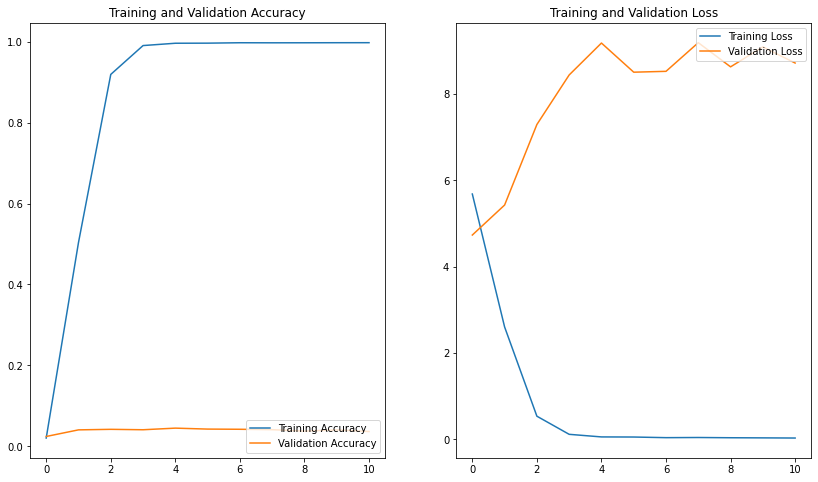

In [ ]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

In [ ]:
# Evaluate model on validation split
model.evaluate(validation_set)

213/213 [==============================] - 15s 68ms/step - loss: 4.7329 - accuracy: 0.0243


[4.7328572273254395, 0.02429686300456524]

# Conv 16/32

Second CNN with 2 layers of Conv and max pooling

In [ ]:
# creating model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_RES,IMAGE_RES, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), 

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2), 

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(120, activation= "softmax")
])

# compiling model
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               11197560  
Total params: 11,202,648
Trainable params: 11,202,648
Non-trainable params: 0
__________________________________________

In [ ]:
# Create a callback that saves the model's weights
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)
# fitting model
history = model.fit(training_set,
                    epochs=EPOCHS,
                    
                    validation_data=validation_set,
                    
                    callbacks=[callback,cp_callback])

Epoch 1/200
431/431 [==============================] - 50s 101ms/step - loss: 5.4240 - accuracy: 0.0146 - val_loss: 4.5964 - val_accuracy: 0.0283

Epoch 00001: val_loss improved from inf to 4.59639, saving model to training_2/cp.ckpt
Epoch 2/200
431/431 [==============================] - 50s 101ms/step - loss: 4.1084 - accuracy: 0.1210 - val_loss: 5.0869 - val_accuracy: 0.0484

Epoch 00002: val_loss did not improve from 4.59639
Epoch 3/200
431/431 [==============================] - 50s 101ms/step - loss: 1.4761 - accuracy: 0.6645 - val_loss: 8.7045 - val_accuracy: 0.0439

Epoch 00003: val_loss did not improve from 4.59639
Epoch 4/200
431/431 [==============================] - 50s 102ms/step - loss: 0.2074 - accuracy: 0.9629 - val_loss: 10.5930 - val_accuracy: 0.0437

Epoch 00004: val_loss did not improve from 4.59639
Epoch 5/200
431/431 [==============================] - 50s 102ms/step - loss: 0.0572 - accuracy: 0.9949 - val_loss: 11.0009 - val_accuracy: 0.0445

Epoch 00005: val_loss d

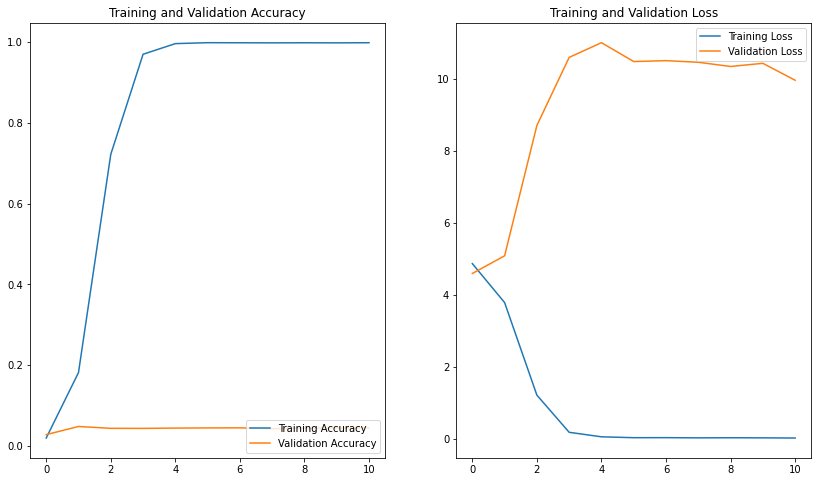

In [ ]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

In [ ]:
# model scoring
model.evaluate(validation_set)

213/213 [==============================] - 15s 68ms/step - loss: 4.5964 - accuracy: 0.0283


[4.596389293670654, 0.028272714465856552]

# Image augmentation

Facing huge overfitting, we will try image augmentation, then dropout layer. First, image augmentation

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

## Rotation example

Found 20580 images belonging to 120 classes.


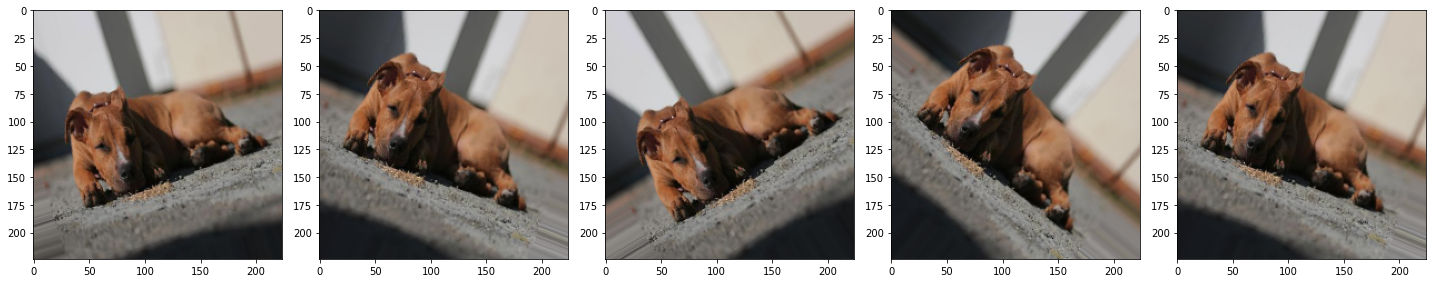

In [ ]:
# creating image generator
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

# augmentation
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=dir,
                                               shuffle=True,
                                               target_size=(IMAGE_RES,IMAGE_RES))
# plotting augmented images
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Zoom example

Found 20580 images belonging to 120 classes.


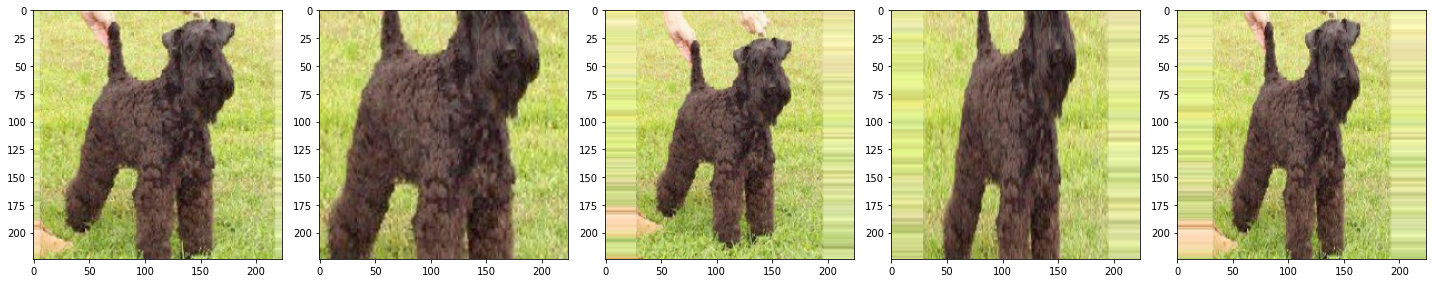

In [ ]:
# creating image generator
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

# augmentation
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=dir,
                                               shuffle=True,
                                               target_size=(IMAGE_RES,IMAGE_RES))

# plotting augmented images
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Rotation, shift and flip example

Found 20580 images belonging to 120 classes.


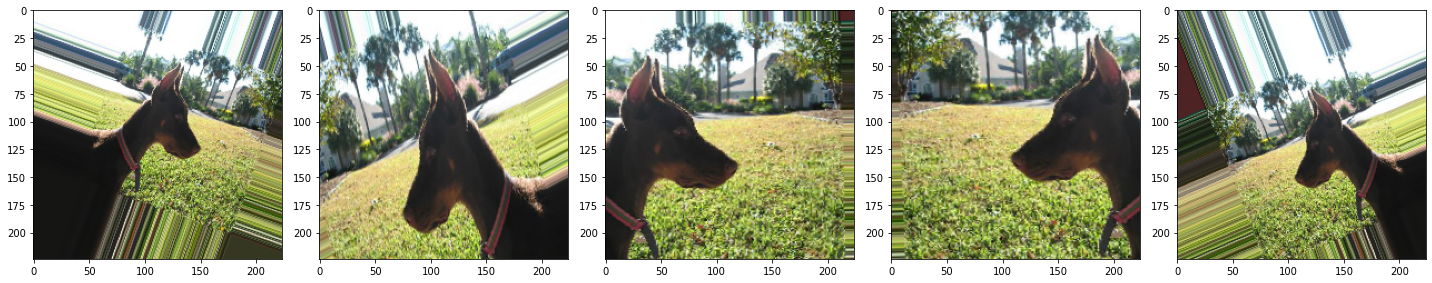

In [ ]:
# creating image generator
image_gen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')
# augmentation
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=dir,
                                               shuffle=True,
                                               target_size=(IMAGE_RES,IMAGE_RES))
# plotting image
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Augmentation on split 

In [ ]:
# creating generator for training set
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.15,
      height_shift_range=0.15,
      shear_range=0.2,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.33)

# loading and augmenting train set
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=dir,
                                                     shuffle=True,
                                                     target_size=(IMAGE_RES,IMAGE_RES),
                                                     class_mode='binary',
                                                     seed=78,
                                                     subset='training')
# creating generator for validation set (rescaling only)
image_gen_val = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.33)

# loading and augmenting validation set
valid_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=dir,
                                                     shuffle=True,
                                                     target_size=(IMAGE_RES,IMAGE_RES),
                                                     class_mode='binary',
                                                     seed=78,
                                                     subset='validation')

Found 13846 images belonging to 120 classes.
Found 6734 images belonging to 120 classes.


In [ ]:
# creating model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_RES,IMAGE_RES, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), 

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(120, activation= "softmax")
])
# compile model
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 197136)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               23656440  
Total params: 23,656,888
Trainable params: 23,656,888
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create a callback that saves the model's weights
checkpoint_path = "training_3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

EPOCHS = 10 # since first 2 CNN stopped at 10

# fitting model
history = model.fit(train_data_gen,
                    epochs=EPOCHS,
                    
                    validation_data=valid_data_gen,
                    
                    callbacks=[callback,cp_callback])

Epoch 1/10
433/433 [==============================] - 193s 446ms/step - loss: 7.6478 - accuracy: 0.0104 - val_loss: 4.8205 - val_accuracy: 0.0171

Epoch 00001: val_loss improved from inf to 4.82048, saving model to training_3/cp.ckpt
Epoch 2/10
433/433 [==============================] - 192s 444ms/step - loss: 4.7421 - accuracy: 0.0217 - val_loss: 4.8689 - val_accuracy: 0.0229

Epoch 00002: val_loss did not improve from 4.82048
Epoch 3/10
433/433 [==============================] - 192s 444ms/step - loss: 4.7233 - accuracy: 0.0231 - val_loss: 4.8635 - val_accuracy: 0.0264

Epoch 00003: val_loss did not improve from 4.82048
Epoch 4/10
433/433 [==============================] - 192s 444ms/step - loss: 4.6945 - accuracy: 0.0285 - val_loss: 4.8494 - val_accuracy: 0.0266

Epoch 00004: val_loss did not improve from 4.82048
Epoch 5/10
433/433 [==============================] - 193s 445ms/step - loss: 4.6728 - accuracy: 0.0283 - val_loss: 4.9615 - val_accuracy: 0.0278

Epoch 00005: val_loss did

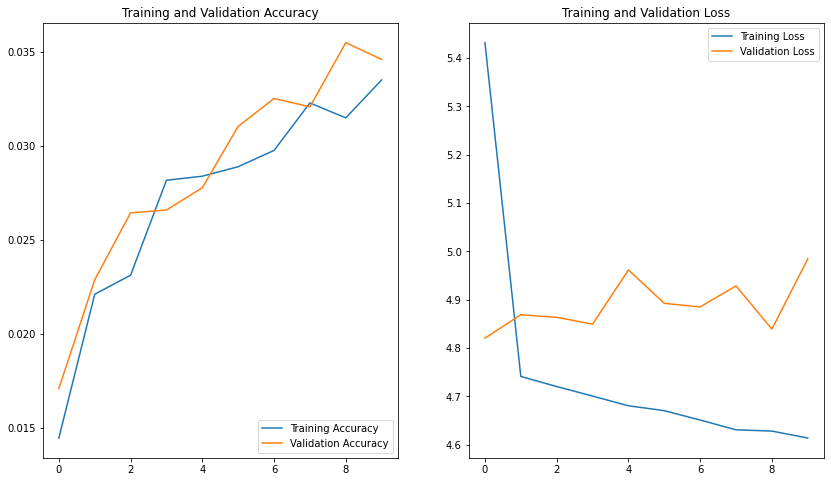

In [ ]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

In [ ]:
# model scoring
model.evaluate(validation_set)

213/213 [==============================] - 15s 68ms/step - loss: 4.7486 - accuracy: 0.0208


[4.748584747314453, 0.020762775093317032]

# Dropout

In [ ]:
# creating model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_RES,IMAGE_RES, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), 

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2), 

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(120, activation= "softmax")
])
# compile model
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dropout (Dropout)            (None, 93312)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

In [ ]:

# Create a callback that saves the model's weights
checkpoint_path = "training_4/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

EPOCHS = 10 # since first two CNN stopped at 10

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(training_set,
                    epochs=EPOCHS,
                    
                    validation_data=validation_set,
                    
                    callbacks=[callback,cp_callback])

Epoch 1/10
431/431 [==============================] - 51s 102ms/step - loss: 5.1216 - accuracy: 0.0184 - val_loss: 4.4975 - val_accuracy: 0.0465

Epoch 00001: val_loss improved from inf to 4.49747, saving model to training_4/cp.ckpt
Epoch 2/10
431/431 [==============================] - 50s 102ms/step - loss: 3.3657 - accuracy: 0.2631 - val_loss: 5.2752 - val_accuracy: 0.0517

Epoch 00002: val_loss did not improve from 4.49747
Epoch 3/10
431/431 [==============================] - 51s 103ms/step - loss: 0.6500 - accuracy: 0.8675 - val_loss: 7.9721 - val_accuracy: 0.0468

Epoch 00003: val_loss did not improve from 4.49747
Epoch 4/10
431/431 [==============================] - 50s 102ms/step - loss: 0.1147 - accuracy: 0.9872 - val_loss: 9.5297 - val_accuracy: 0.0468

Epoch 00004: val_loss did not improve from 4.49747
Epoch 5/10
431/431 [==============================] - 50s 102ms/step - loss: 0.0640 - accuracy: 0.9949 - val_loss: 9.8732 - val_accuracy: 0.0476

Epoch 00005: val_loss did not 

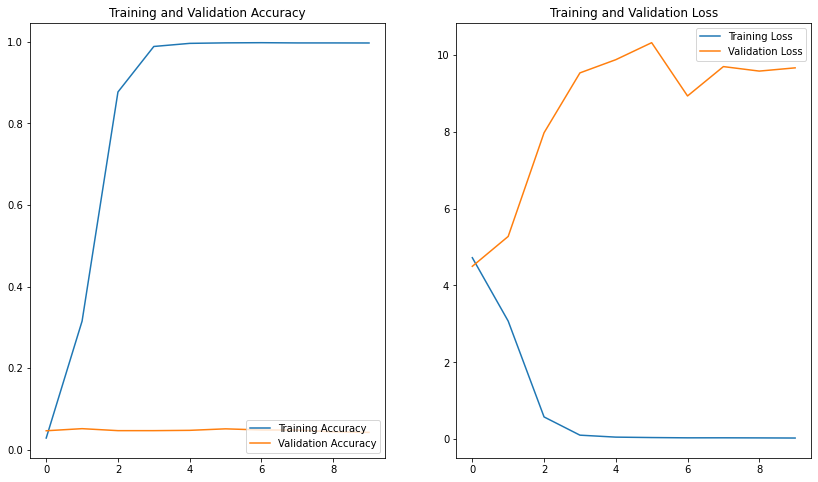

In [ ]:
# Plotting accuracy and val loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_path)

In [ ]:
# model scoring
model.evaluate(validation_set)

213/213 [==============================] - 15s 69ms/step - loss: 4.4975 - accuracy: 0.0465


[4.497471809387207, 0.046532176434993744]